# Threshold
Las funciones de threshold son muy importantes, ya que con una simple operación de qué pixel está por encima o por debajo de un umbral se pueden obtener máscaras de todo tipo y muy rápido.

In [2]:
myPath = ''

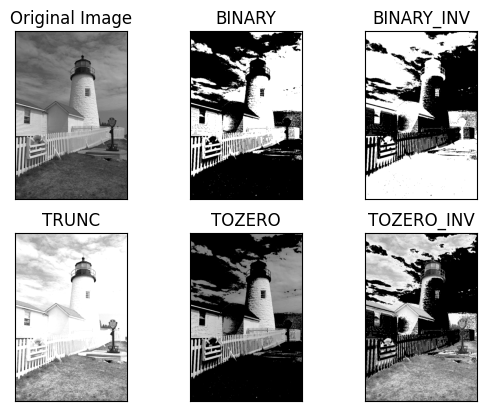

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(myPath+'img/kodim19.png',0)

VALUE = 120
ret,thresh1 = cv2.threshold(img,VALUE,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,VALUE,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,VALUE,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,VALUE,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,VALUE,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Threshold Adaptivo


Cuando las condiciones de luminosidad varian según la escena, el threshold anterior no resulta efectivo, para esto es mejor usar uno adaptivo.

Existen 2 formas:
  * MEAN: media de los píxeles cercanos en un entorno
  * GAUSSIAN: Se usa una ventana gaussiana para ponderar el peso de los pixeles vecinos

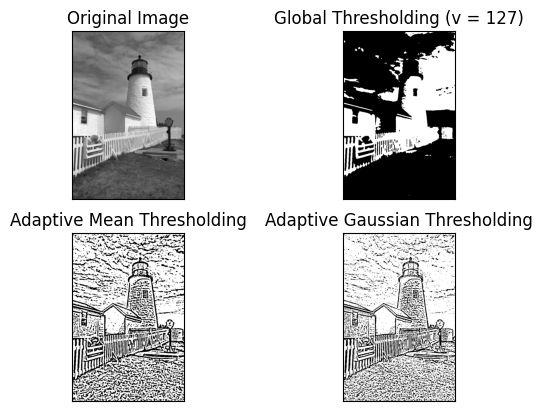

In [9]:
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()